## Modelo de classificação Binária  
O dataset que utilizei foi pego da UCI Machine Learning: https://archive.ics.uci.edu/dataset/174/parkinsons.

 **Este conjunto de dados é composto por uma série de medições biomédicas de voz de 31 pessoas, 23 com doença de Parkinson (DP).O principal objetivo dos dados é discriminar pessoas saudáveis ​​daquelas com DP, de acordo com a coluna "status" que é definida como 0 para DP e 1 para (Saudável) .**





---



------------------------------------------------------------------------------------------------------------------------------------------




### **Dicionário dos dados:**

Explicando o tipo de informação presente em cada feature:

*   nome - nome do assunto ASCII e número da gravação.
*   MDVP:Fo(Hz) -Frequência vocal fundamental média.
*   MDVP:Fhi(Hz) -Frequência vocal fundamental máxima.
*   Flo(Hz) - Frequência vocal mínima fundamental.
*   MDVP: Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP- Várias medidas de variação na frequência fundamental.
*   MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5, MDVP:APQ,Shimmer:DDA - Várias medidas de variação na amplitude.
*   NHR,HNR - Duas medidas de proporção de ruído para componentes tonais no estado da voz.
*   status- define a saúde do sujeito: (1) = Parkinson, (0) = Saudavel.
*   RPDE , D2 - Duas medidas de complexidade dinâmica não linear.
*   DFA - Expoente de escala fractal de sinal.
*   spread1,spread2,PPE - Três medidas não lineares de variação de frequência fundamental.




----------------------------------------------------------------------------------------------------------------------------------------------------------------

Etapas do Projeto
  
*   Análise exploratória.
*   Pré-Processamento dos dados.
*   Implementação  de cada modelo.
*   Avaliação do modelo (Visualização gráfica de métricas  para ajudar avaliar o desempenho do modelo).
*   Comparação dos modelos.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

Os modelos usados no projeto:


1.  Logistic Regression.
2.  K-Nearest Neighbour (KNN) .
3.  Support Vector Machine (SVM).
4.  Gaussian Naive Bayes.
5.  Decision Tree.
6.  Random Forest.
7.  Extra Tree Classifier.
8.  Gradient Boosting .
9.  Xgboost.






Instalando Pandas Profiling

In [ ]:
!pip install pandas-profiling

importando todas as bibliotecas que utilizaremos no projeto:

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, auc
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,  ExtraTreesClassifier
from  xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/parkinsons.data")

## Análise exploratória

----------------------------------------------------------------------------------------------------------------------------------------------------------------

### Pandas profiling -Traz uma Forma automatizada  de fazer a analise exploratoria .




In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Relatório Automatizado', html={'style':{'full_width':True}})

profile.to_notebook_iframe()

profile.to_file(output_file="Relatório Automatizado.html")

----------------------------------------------------------------------------------------------------------------------------------------------------------------

Principal motivo de  utilizarmos o Pandas Profiling está na redução  do tempo que levariamos para concluir uma boa analise exploratória sem ele.

O relatório automatizado trouxe inumeras  informações do dataset.

*   Ele traz valores missing, valores distintos ,valores unicos de cada variavel .
*   Traz estatistica descritiva de campos numericos (media,moda,mediana,etc..)
*   Traz  varios tipos de Graficos.
*   Traz valores extremos de cada campo.
*   Traz correlaçoes(comparação da  influência que uma váriavel tem com relação a outra ou da variavel com o target).
*  Traz interaçoes e etc...



----------------------------------------------------------------------------------------------------------------------------------------------------------------

⚠  Devido o dataset conter features muito similares(medidas referentes a  voz) compreendemos que certamente ocorrerá features muito relacionadas  e será necessario elimina-las do modelo,evitando assim a multicolineariedade.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

Eliminação das features.


In [ ]:
#as features a seguir se permanecessem no modelo iriam prejudicar o desempenho
#por serem muito correlacionadas com as que ficam no modelo
#Além das correlaçoes entre elas,  analisei qual delas teriam maiores  influencias  no 'status'(target)

del df['MDVP:Jitter(%)']
del df['Shimmer:APQ3']
del df['Shimmer:APQ5']
del df['MDVP:PPQ']
del df['Jitter:DDP']
del df['MDVP:Shimmer(dB)']
del df['MDVP:APQ']
del df['Shimmer:DDA']
del df[ 'NHR']
del df[ 'PPE']
del df['HNR']
del df['MDVP:Jitter(Abs)']
del df ['MDVP:Flo(Hz)']
del df['MDVP:Fo(Hz)']
del df ['name']

#removi o 'name' pois nao teria uso
#Pandas profiling ajudou muito também la ele ja indica as variaveis com alta correlaçao
#['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'MDVP:APQ', 'Shimmer:DDA','HNR','PPE',"NHR"]
#Elas sao muito  correlacionadas com as outras

**Assegurando que não há presença de valores missing e de valores duplicados no dataset :**

In [ ]:
df.isnull().sum()

MDVP:Fhi(Hz)    0
MDVP:RAP        0
MDVP:Shimmer    0
status          0
RPDE            0
DFA             0
spread1         0
spread2         0
D2              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

### Obs: Se a caso tivesse  valores missing seria necessário a eliminação ou imputação.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

Descobrindo mais informações do dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MDVP:Fhi(Hz)  195 non-null    float64
 1   MDVP:RAP      195 non-null    float64
 2   MDVP:Shimmer  195 non-null    float64
 3   status        195 non-null    int64  
 4   RPDE          195 non-null    float64
 5   DFA           195 non-null    float64
 6   spread1       195 non-null    float64
 7   spread2       195 non-null    float64
 8   D2            195 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 13.8 KB


# Pré Processamento

In [ ]:
#Aplicando o labelEncoder para transformar a variavel target em numerica

labelencoder = LabelEncoder()
df['status'] = labelencoder.fit_transform(df['status'])

print(df['status'].unique())


#Defino x e y e colando eles  em um array numpy
X=df.drop(['status'],axis=1).values
y=df['status'].values






[1 0]


In [ ]:
#defino os dados de treino e de teste

#defino o tamanho dos dados de teste


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Normalização dos dados-  devido as escalas serem diferentes,  também  por ser um dataset pequeno é necessario evitar a influência de algum  valor discrepante(outlier) para que assim o modelo não seja inviezado.

In [ ]:
#Normalizando os dados
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

Implementação dos modelos.

*    ✅Cada modelo será treinado e fará as predições.
*    ✅Para a otimização dos hiperparametros utilizei o RandomSearch
*    ✅Métricas utilizadas  nesse problema para esse problema de  classificação  Confusion matrix ,curva Roc.
*    ✅Classification report(relatório de classificação para avaliar o desempenho do modelo)
   

# **Definição**


***RandomSearch*** - RandomSearch, ou busca aleatória, é um algoritmo de otimização usado para encontrar a melhor combinação de hiperparâmetros em um modelo de machine learning. Ele funciona gerando um conjunto aleatório de valores para os hiperparâmetros especificados e avaliando o desempenho do modelo para cada combinação


***Matriz de confusão(Confusion matrix)***- A matriz de confusão  é uma ferramenta usada em problemas de classificação para avaliar o desempenho de um modelo de machine learning. Ela mostra a contagem de instâncias classificadas
corretamente e incorretamente pelo modelo em relação às classes reais.
A matriz de confusão tem uma estrutura quadrada, com linhas representando as classes reais e colunas representando as classes previstas pelo modelo. A diagonal principal da matriz contém os valores que representam as instâncias corretamente classificadas, enquanto as células fora da diagonal principal representam as instâncias classificadas incorretamente.
 A matriz de confusão fornece várias métricas importantes, incluindo:
Verdadeiro Positivo (TP): o número de instâncias corretamente classificadas como positivas.
Falso Positivo (FP): o número de instâncias incorretamente classificadas como positivas.
Verdadeiro Negativo (TN): o número de instâncias corretamente classificadas como negativas.
Falso Negativo (FN): o número de instâncias incorretamente classificadas como negativas. Com base nesses valores, é possível calcular diversas métricas de avaliação, como acurácia, precisão, recall (taxa de verdadeiros positivos) e F1-score, que fornecem uma visão detalhada do desempenho do modelo em cada classe.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

***Curva Roc***-A curva roc traça a taxa de verdadeiros positivos (TPR) em relação à taxa de falsos positivos (FPR) para diferentes limiares de classificação.


----------------------------------------------------------------------------------------------------------------------------------------------------------------

Classification report-Um relatório de classificação é uma métrica de avaliação comumente usada em aprendizado de máquina, especificamente em tarefas de classificação. Ele fornece um resumo detalhado do desempenho de um modelo de classificação em um conjunto de dados, incluindo métricas como precisão, recall, pontuação F1 e suporte para cada classe.

Aqui está uma explicação das principais métricas normalmente incluídas em um relatório de classificação:

-Precisão:  *A precisão, também conhecida como valor preditivo positivo, mede a precisão das previsões positivas feitas pelo modelo. Ela é calculada como a razão entre os verdadeiros positivos (TP) e a sAoma dos verdadeiros positivos e falsos positivos (FP). Uma precisão mais alta indica menos falsos positivos.*

-Recall: O recall, também conhecido como sensibilidade ou taxa de verdadeiros positivos, mede a capacidade do modelo de identificar corretamente as instâncias positivas. É calculado como a razão entre os verdadeiros positivos (TP) e a soma dos verdadeiros positivos e falsos negativos (FN). Um recall mais alto indica menos falsos negativos.

-Pontuação F1: A pontuação F1 é a média harmônica entre precisão e recall. Ela fornece uma medida geral do desempenho do modelo, equilibrando tanto a precisão quanto o recall.

-Suporte: O suporte é o número de ocorrências reais de cada classe no conjunto de dados. Ele mostra quantas instâncias pertencem a cada classe e pode ser útil para avaliar o desequilíbrio de classe no conjunto de dados.

Um relatório de classificação é uma ferramenta valiosa para avaliar o desempenho do modelo em cada classe, identificar possíveis desequilíbrios ou problemas de classificação e tomar decisões informadas com base nas métricas apresentadas.

Regressão Logistica ⚡

In [ ]:
#chamando o  modelo
modelo_lr=LogisticRegression()

# Definindo valores
valores_params= {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
random_search = RandomizedSearchCV(estimator=modelo_lr, param_distributions=valores_params, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)

#Escolhendo oo melhor modelo

best_model_lr = random_search.best_estimator_

#Trazendo a Acuracia
accuracy = best_model_lr.score(X_test_scaled , y_test)

#Matriz confusao
y_pred_lr = best_model_lr.predict(X_test_scaled)
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)

print("Acurácia do modelo {:.2f}".format(accuracy),'\n','Melhor parametro :',best_model_lr)

Acurácia do modelo 0.90 
 Melhor parametro : LogisticRegression(C=1000)


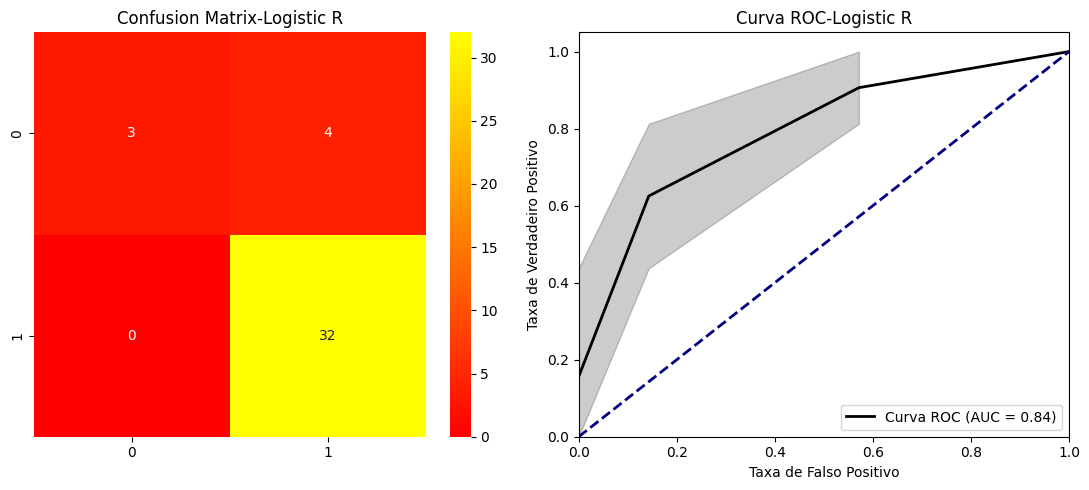

In [ ]:
#Curva Roc
y_prob = best_model_lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


# Configurar o layout dos subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# Plotar a confusion matrix
sns.heatmap(confusion_mat_lr, annot=True, cmap="autumn", ax=axs[0])

axs[0].set_title("Confusion Matrix-Logistic R")

# Plotar a curva ROC
df_roc = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
sns.lineplot(x='False Positive Rate', y='True Positive Rate', data=df_roc, color='Black', lw=2,
             label='Curva ROC (AUC = %0.2f)' % roc_auc, ax=axs[1])
sns.lineplot(x=[0, 1], y=[0, 1], color='Navy', lw=2, linestyle='--', ax=axs[1])

axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Taxa de Falso Positivo')
axs[1].set_ylabel('Taxa de Verdadeiro Positivo')
axs[1].set_title('Curva ROC-Logistic R')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()





In [ ]:
#Classification report

classification_rep_lr = classification_report(y_test, y_pred_lr)
print("Relatório de Classificação da Regressão Logistica :\n", classification_rep_lr)

Relatório de Classificação da Regressão Logistica :
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Então como podemos avaliar o modelo a partir das métricas fornecidas? A  acurácia do modelo devolve um valor que no caso da Regressão logistica está acertando  90 % . Mas a questão é, essa acurácia em teoria estaria  devolvendo a assertividade do modelo em relação a previsão de parkison(0) porém na verdade essa acurácia está  devolvendo a quantidade de vezes que acertou quando não era parkison(1) que nesse caso é a grande maioria dos acertos do modelo,como podemos ver no relatório de classificação e também comparando os graficos.**

---





 **E por meio das metricas conseguimos distinguir a acurácia para essas duas classes indivualmente  e ainda trazer uma media harmônica (F1-score).**

---



----------------------------------------------------------------------------------------------------------------------------------------------------------------

K-Nearest Neighbour (KNN) ⚡

In [ ]:
#Definindo o modelo
modelo_knn=KNeighborsClassifier()

#Definindo valores
valores_params= {'n_neighbors': [3, 5, 7,9,11,13], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
random_search = RandomizedSearchCV(estimator=modelo_knn, param_distributions=valores_params, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)

#Chamando o melhor modelo
best_model_knn = random_search.best_estimator_

#Trazendo a Acuracia
accuracy = best_model_knn.score(X_test_scaled, y_test)

#Matriz confuão
y_pred_knn = best_model_knn.predict(X_test_scaled)
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)
print("Acurácia do modelo no conjunto de teste: {:.2f}".format(accuracy),'\n','Melhor parametro :',best_model_knn)


Acurácia do modelo no conjunto de teste: 0.90 
 Melhor parametro : KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)


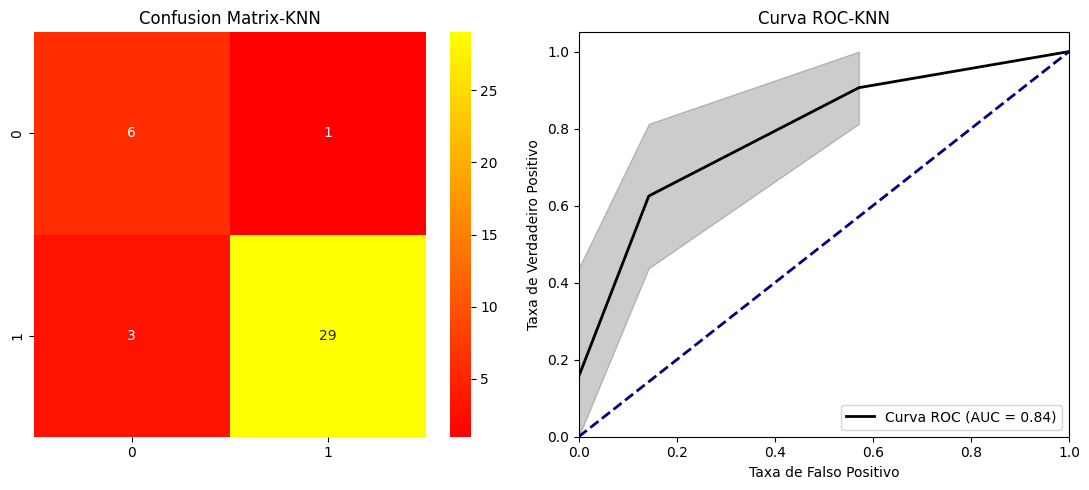

In [ ]:
#Curva roc
y_prob = best_model_lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Configurar o layout dos subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# Plotar a matriz de confusão
sns.heatmap(confusion_mat_knn, annot=True, cmap="autumn", ax=axs[0])

axs[0].set_title("Confusion Matrix-KNN")

# Plotar a curva ROC
df_roc = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
sns.lineplot(x='False Positive Rate', y='True Positive Rate', data=df_roc, color='Black', lw=2,
             label='Curva ROC (AUC = %0.2f)' % roc_auc, ax=axs[1])
sns.lineplot(x=[0, 1], y=[0, 1], color='Navy', lw=2, linestyle='--', ax=axs[1])

axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Taxa de Falso Positivo')
axs[1].set_ylabel('Taxa de Verdadeiro Positivo')
axs[1].set_title('Curva ROC-KNN')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()



In [ ]:
#Classification report
classification_rep_knn = classification_report(y_test, y_pred_knn)
print("Relatório de Classificação  KNN:\n", classification_rep_knn)

Relatório de Classificação  KNN:
               precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.97      0.91      0.94        32

    accuracy                           0.90        39
   macro avg       0.82      0.88      0.84        39
weighted avg       0.91      0.90      0.90        39



Support Vector Machine(SVM) ⚡

In [ ]:
#definindo o modelo

modelo_svm=SVC()
#definindo valores
valores_params= {
                 'C': [0.001,0.01,0.1,1,10,100,1000]
}
random_search = RandomizedSearchCV(estimator=modelo_svm, param_distributions=valores_params, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)

#Melhor modelo

best_model_svm = random_search.best_estimator_

#Trazendo a Acuracia
accuracy = best_model_svm.score(X_test_scaled, y_test)

#Matriz confusao
y_pred_svm = best_model_knn.predict(X_test_scaled)
confusion_mat_svm = confusion_matrix(y_test, y_pred_knn)
print("Acurácia do modelo no conjunto de teste: {:.2f}".format(accuracy),'\n','Melhor parametro :',best_model_svm)

Acurácia do modelo no conjunto de teste: 0.95 
 Melhor parametro : SVC(C=10)


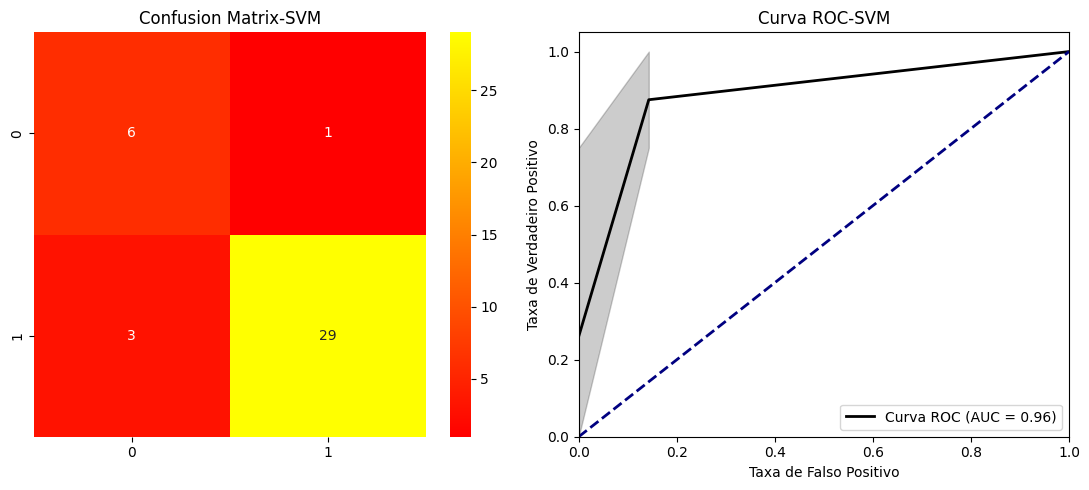

In [ ]:
#Curva roc
y_scores = best_model_svm.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Configurar o layout dos subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# Plotar a matriz de confusão
sns.heatmap(confusion_mat_svm, annot=True, cmap="autumn", ax=axs[0])

axs[0].set_title("Confusion Matrix-SVM")

# Plotar a curva ROC
df_roc = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
sns.lineplot(x='False Positive Rate', y='True Positive Rate', data=df_roc, color='Black', lw=2,
             label='Curva ROC (AUC = %0.2f)' % roc_auc, ax=axs[1])
sns.lineplot(x=[0, 1], y=[0, 1], color='Navy', lw=2, linestyle='--', ax=axs[1])

axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Taxa de Falso Positivo')
axs[1].set_ylabel('Taxa de Verdadeiro Positivo')
axs[1].set_title('Curva ROC-SVM')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()



In [ ]:
#classification report

classification_rep_svm = classification_report(y_test, y_pred_svm)
print("Relatório de Classificação  SVM :\n", classification_rep_svm)

Relatório de Classificação  SVM :
               precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.97      0.91      0.94        32

    accuracy                           0.90        39
   macro avg       0.82      0.88      0.84        39
weighted avg       0.91      0.90      0.90        39



Gaussian Nayve Bayes ⚡

In [ ]:
#Definindo modelo
modelo = GaussianNB()

#Definindo valores
valores_params= {
                     'var_smoothing': np.logspace(-9, 0, num=10)
}


random_search = RandomizedSearchCV(estimator=modelo, param_distributions=valores_params, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)

#melhor modelo
best_model_Gaus = random_search.best_estimator_

#Trazendo a Acuracia
accuracy = best_model_Gaus.score(X_test_scaled, y_test)

#matriz confusao
y_pred_Gaus = best_model_Gaus.predict(X_test_scaled)
confusion_mat_Gaus = confusion_matrix(y_test, y_pred_Gaus)
print("Acurácia do modelo no conjunto de teste: {:.2f}".format(accuracy),'\n','Melhor parametro :',best_model_Gaus)

Acurácia do modelo no conjunto de teste: 0.90 
 Melhor parametro : GaussianNB(var_smoothing=1.0)


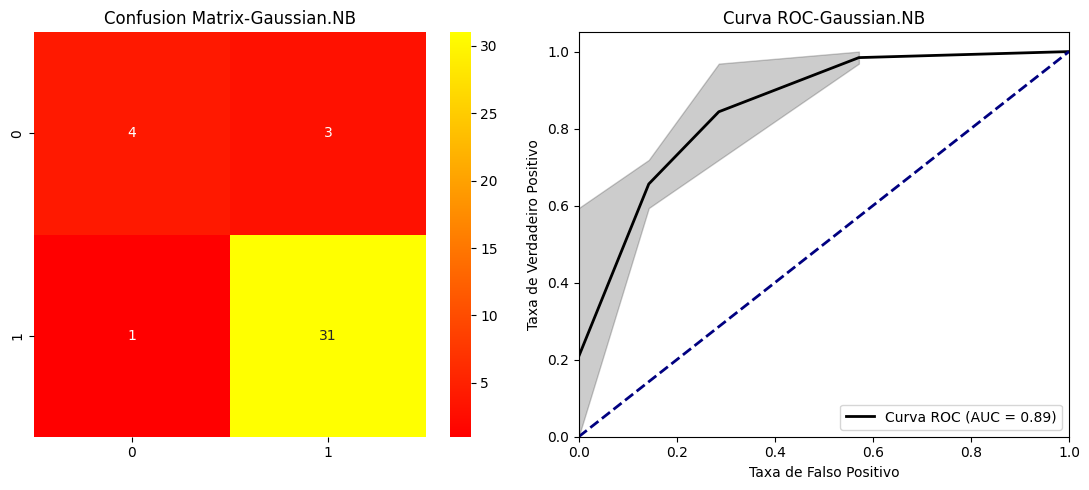

In [ ]:
#curva roc
y_prob = best_model_Gaus.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)



# Configurar o layout dos subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# Plotar a matriz de confusão
sns.heatmap(confusion_mat_Gaus, annot=True, cmap="autumn", ax=axs[0])

axs[0].set_title("Confusion Matrix-Gaussian.NB")

# Plotar a curva ROC
df_roc = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
sns.lineplot(x='False Positive Rate', y='True Positive Rate', data=df_roc, color='Black', lw=2,
             label='Curva ROC (AUC = %0.2f)' % roc_auc, ax=axs[1])
sns.lineplot(x=[0, 1], y=[0, 1], color='Navy', lw=2, linestyle='--', ax=axs[1])

axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Taxa de Falso Positivo')
axs[1].set_ylabel('Taxa de Verdadeiro Positivo')
axs[1].set_title('Curva ROC-Gaussian.NB')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
#classifation report
classification_rep_Gaus = classification_report(y_test, y_pred_Gaus)
print("Relatório de Classificação Gaussian Nayve B  :\n", classification_rep_Gaus)

Relatório de Classificação Gaussian Nayve B  :
               precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39



O Modelo de arvore de decisão e o restante da categoria "Ensemble" ainda contarão com o grafico da sua respectiva feature importance (Importancia da variavel para o modelo)



Decision Tree ⚡

In [ ]:
#definindo modelo

modelo_dt=DecisionTreeClassifier()

#definindo valores
valores_params= {'criterion':['gini', 'entropy', 'log_loss'],
                 'max_leaf_nodes': [None, 5, 10, 20],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]

}

random_search = RandomizedSearchCV(estimator=modelo_dt, param_distributions=valores_params, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)

#definindo melhor modelo
best_model_dt = random_search.best_estimator_

#Trazendo a Acuracia
accuracy = best_model_dt.score(X_test_scaled, y_test)

#definindo confusion matrix

y_pred_dt = best_model_dt.predict(X_test_scaled)
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)
print("Acurácia do modelo no conjunto de teste: {:.2f}".format(accuracy),'\n','Melhor parametro :',best_model_dt)

Acurácia do modelo no conjunto de teste: 0.95 
 Melhor parametro : DecisionTreeClassifier(criterion='log_loss', max_depth=5, min_samples_split=5)


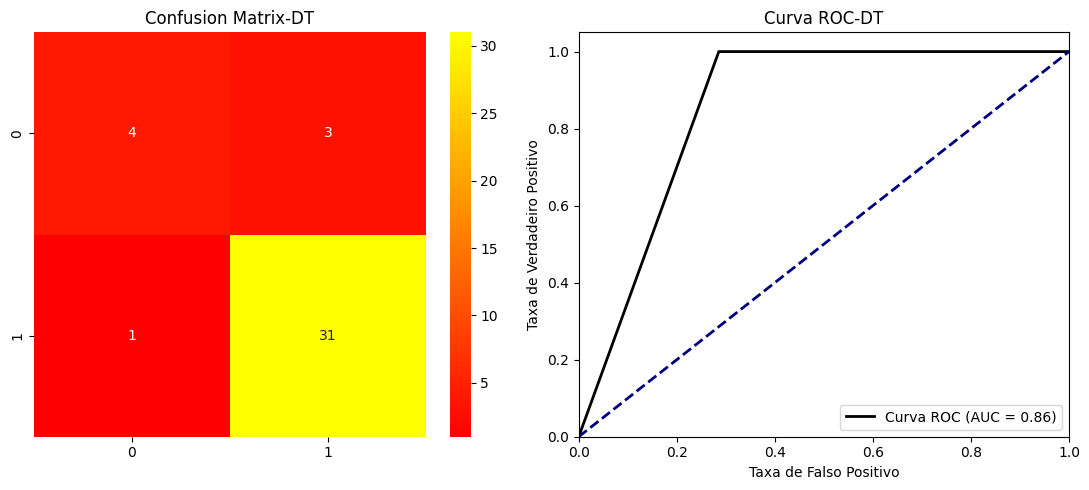

In [ ]:
#curva roc
y_prob = best_model_dt.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Configurar o layout dos subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# Plotar a matriz de confusão
sns.heatmap(confusion_mat_Gaus, annot=True, cmap="autumn", ax=axs[0])

axs[0].set_title("Confusion Matrix-DT")

# Plotar a curva ROC
df_roc = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
sns.lineplot(x='False Positive Rate', y='True Positive Rate', data=df_roc, color='Black', lw=2,
             label='Curva ROC (AUC = %0.2f)' % roc_auc, ax=axs[1])
sns.lineplot(x=[0, 1], y=[0, 1], color='Navy', lw=2, linestyle='--', ax=axs[1])

axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Taxa de Falso Positivo')
axs[1].set_ylabel('Taxa de Verdadeiro Positivo')
axs[1].set_title('Curva ROC-DT')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
#classification report
classification_rep_dt = classification_report(y_test, y_pred_dt)
print("Relatório de Classificação  Decision Tree :\n", classification_rep_dt)

Relatório de Classificação  Decision Tree :
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Feature importance-   é uma medida que indica a contribuição relativa de cada variável ou característica para um determinado modelo de aprendizado de máquina. Essa medida é útil para entender quais variáveis têm maior influência na capacidade preditiva do modelo.**

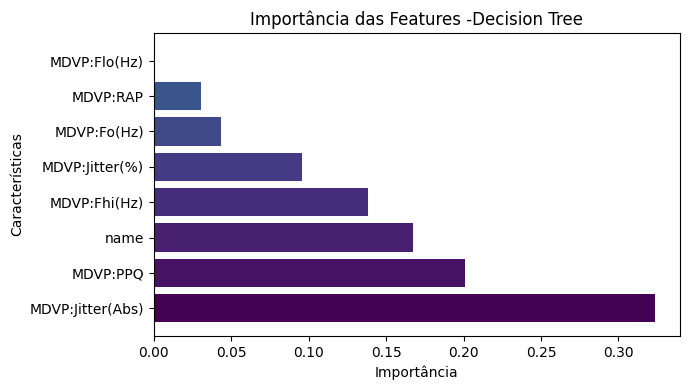

In [ ]:
# Calcular a importância das características
importances = best_model_dt.feature_importances_

# Obter os nomes das características
feature_names = df.columns

# Ordenar as importâncias das características em ordem decrescente
indices = np.argsort(importances)[::-1]

# Definir uma paleta de cores personalizada
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_names)))

# Plotar as importâncias das características com barras coloridas
plt.figure(figsize=(7, 4))
plt.title("Importância das Features -Decision Tree")
plt.barh(range(X.shape[1]), importances[indices], align="center", color=colors)
plt.yticks(range(X.shape[1]), feature_names[indices])
plt.xlabel("Importância")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

Random Forest ⚡

In [ ]:
#Definindo modelo

modelo_rf=RandomForestClassifier()


#definindo valores
valores_params= {
                     'criterion':['gini', 'entropy', 'log_loss'],
                      'max_depth': [None, 5, 10, 20],
                      'min_samples_split': [2, 5, 10],
                     'max_leaf_nodes': [None, 5, 10, 20]
}
random_search = RandomizedSearchCV(estimator=modelo_rf, param_distributions=valores_params, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)


#melhor modelo
best_model_rf = random_search.best_estimator_

#Trazendo a Acuracia
y_pred_rf = best_model_rf.predict(X_test_scaled)

#confusion matrix

confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
accuracy = best_model_rf.score(X_test_scaled, y_test)
print("Acurácia do modelo no conjunto de teste: {:.2f}".format(accuracy),'\n','Melhor parametro :',best_model_rf)

Acurácia do modelo no conjunto de teste: 0.95 
 Melhor parametro : RandomForestClassifier(max_depth=20)


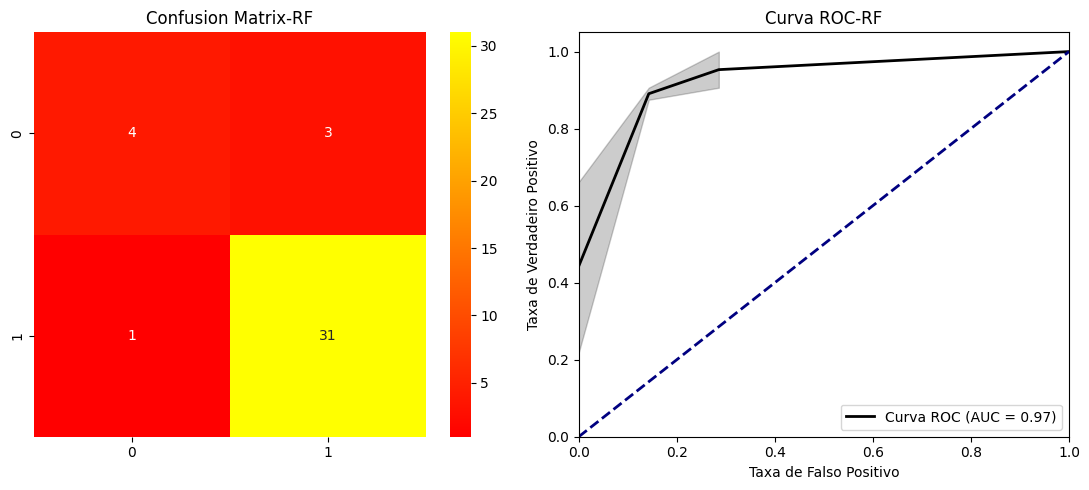

In [ ]:
#curva roc

y_prob = best_model_rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Configurar o layout dos subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# Plotar a matriz de confusão
sns.heatmap(confusion_mat_Gaus, annot=True, cmap="autumn", ax=axs[0])

axs[0].set_title("Confusion Matrix-RF")

# Plotar a curva ROC
df_roc = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
sns.lineplot(x='False Positive Rate', y='True Positive Rate', data=df_roc, color='Black', lw=2,
             label='Curva ROC (AUC = %0.2f)' % roc_auc, ax=axs[1])
sns.lineplot(x=[0, 1], y=[0, 1], color='Navy', lw=2, linestyle='--', ax=axs[1])

axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Taxa de Falso Positivo')
axs[1].set_ylabel('Taxa de Verdadeiro Positivo')
axs[1].set_title('Curva ROC-RF')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
#classification report
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Relatório de Classificação  Random Forest  :\n", classification_rep_rf)

Relatório de Classificação  Random Forest  :
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



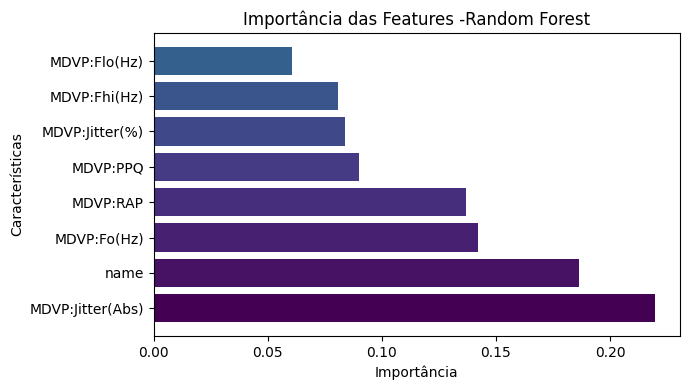

In [ ]:
# Calcular a importância das características
importances = best_model_rf.feature_importances_

# Obter os nomes das características
feature_names = df.columns

# Ordenar as importâncias das características em ordem decrescente
indices = np.argsort(importances)[::-1]

# Definir uma paleta de cores personalizada
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_names)))

# Plotar as importâncias das características com barras coloridas
plt.figure(figsize=(7, 4))
plt.title("Importância das Features -Random Forest")
plt.barh(range(X.shape[1]), importances[indices], align="center", color=colors)
plt.yticks(range(X.shape[1]), feature_names[indices])
plt.xlabel("Importância")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

Extra Tree Classifier ⚡

In [ ]:
#definindo modelo
modelo_et=ExtraTreesClassifier()

#definindo valores

valores_params= {
                     'criterion':['gini', 'entropy', 'log_loss'],
                      'max_depth': [None, 5, 10, 20],
                      'min_samples_split': [2, 5, 10],
                     'max_leaf_nodes': [None, 5, 10, 20]
}
random_search = RandomizedSearchCV(estimator=modelo_et, param_distributions=valores_params, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)

#melhor modelo
best_model_et = random_search.best_estimator_

#Trazendo a Acuracia

accuracy = best_model_et.score(X_test_scaled, y_test)

#confusion matrix

y_pred_et = best_model_et.predict(X_test_scaled)
confusion_mat_et = confusion_matrix(y_test, y_pred_et)


print("Acurácia do modelo no conjunto de teste: {:.2f}".format(accuracy),'\n','Melhor parametro :',best_model_et)

Acurácia do modelo no conjunto de teste: 0.95 
 Melhor parametro : ExtraTreesClassifier(criterion='entropy', max_depth=10, min_samples_split=5)


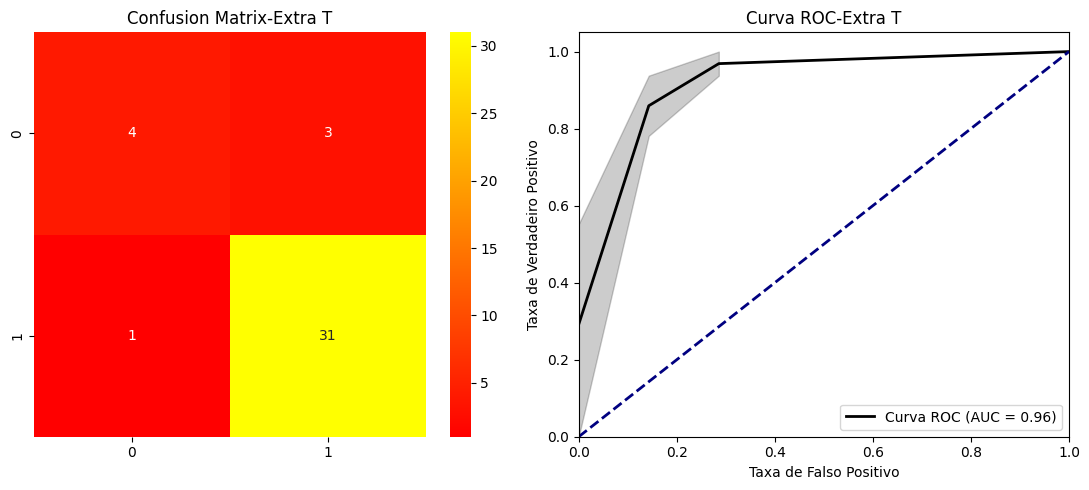

In [ ]:
#curva roc

y_prob = best_model_et.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Configurar o layout dos subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# Plotar a matriz de confusão
sns.heatmap(confusion_mat_Gaus, annot=True, cmap="autumn", ax=axs[0])

axs[0].set_title("Confusion Matrix-Extra T")

# Plotar a curva ROC
df_roc = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
sns.lineplot(x='False Positive Rate', y='True Positive Rate', data=df_roc, color='Black', lw=2,
             label='Curva ROC (AUC = %0.2f)' % roc_auc, ax=axs[1])
sns.lineplot(x=[0, 1], y=[0, 1], color='Navy', lw=2, linestyle='--', ax=axs[1])

axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Taxa de Falso Positivo')
axs[1].set_ylabel('Taxa de Verdadeiro Positivo')
axs[1].set_title('Curva ROC-Extra T')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
#classification report
classification_rep_et = classification_report(y_test, y_pred_et)
print("Relatório de Classificação Extra Tree:\n", classification_rep_et)

Relatório de Classificação Extra Tree:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



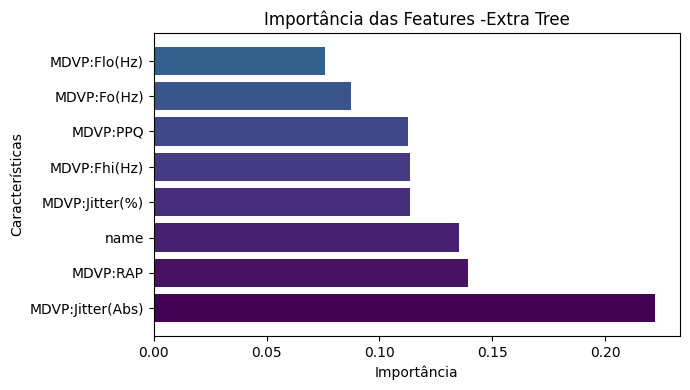

In [ ]:
# Calcular a importância das características
importances = best_model_et.feature_importances_

# Obter os nomes das características
feature_names = df.columns

# Ordenar as importâncias das características em ordem decrescente
indices = np.argsort(importances)[::-1]

# Definir uma paleta de cores personalizada
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_names)))

# Plotar as importâncias das características com barras coloridas
plt.figure(figsize=(7, 4))
plt.title("Importância das Features -Extra Tree")
plt.barh(range(X.shape[1]), importances[indices], align="center", color=colors)
plt.yticks(range(X.shape[1]), feature_names[indices])
plt.xlabel("Importância")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

Gradient boosting ⚡

In [ ]:
#definindo modelo

modelo_gb=GradientBoostingClassifier()


#definindo valores
valores_params= {
                    'n_estimators':[5,10,20,30,40,50,60,70,80],
                      'max_depth': [None, 5, 10, 20],
                      'min_samples_split': [2, 5, 10],
                     'max_leaf_nodes': [None, 5, 10, 20]
}

random_search = RandomizedSearchCV(estimator=modelo_gb, param_distributions=valores_params, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)

#melhor modelo
best_model_gb = random_search.best_estimator_

#Trazendo a Acuracia
accuracy = best_model_et.score(X_test_scaled, y_test)

#confusion matrix


y_pred_gb = best_model_et.predict(X_test_scaled)
confusion_mat_gb = confusion_matrix(y_test, y_pred_gb)
accuracy = best_model_gb.score(X_test_scaled, y_test)
print("Acurácia do modelo no conjunto de teste: {:.2f}".format(accuracy),'\n','Melhor parametro :',best_model_gb)

Acurácia do modelo no conjunto de teste: 0.95 
 Melhor parametro : GradientBoostingClassifier(max_depth=10, max_leaf_nodes=10, n_estimators=70)


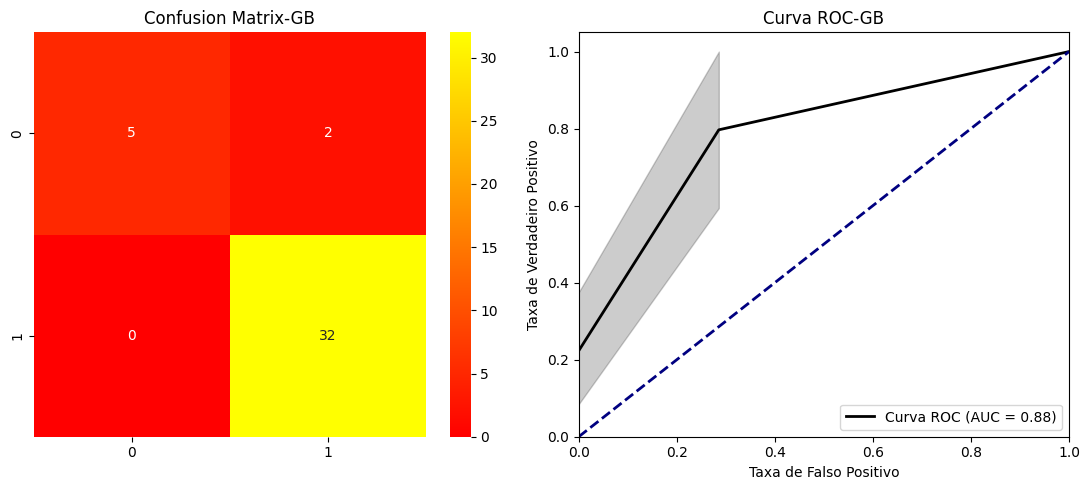

In [ ]:
#curva roc
y_prob = best_model_gb.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Configurar o layout dos subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# Plotar a matriz de confusão
sns.heatmap(confusion_mat_gb, annot=True, cmap="autumn", ax=axs[0])

axs[0].set_title("Confusion Matrix-GB")

# Plotar a curva ROC
df_roc = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
sns.lineplot(x='False Positive Rate', y='True Positive Rate', data=df_roc, color='Black', lw=2,
             label='Curva ROC (AUC = %0.2f)' % roc_auc, ax=axs[1])
sns.lineplot(x=[0, 1], y=[0, 1], color='Navy', lw=2, linestyle='--', ax=axs[1])
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Taxa de Falso Positivo')
axs[1].set_ylabel('Taxa de Verdadeiro Positivo')
axs[1].set_title('Curva ROC-GB')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
classification_rep_gb = classification_report(y_test, y_pred_gb)
print("Relatório de Classificação Gradient Boosting :\n", classification_rep_gb)

Relatório de Classificação Gradient Boosting :
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



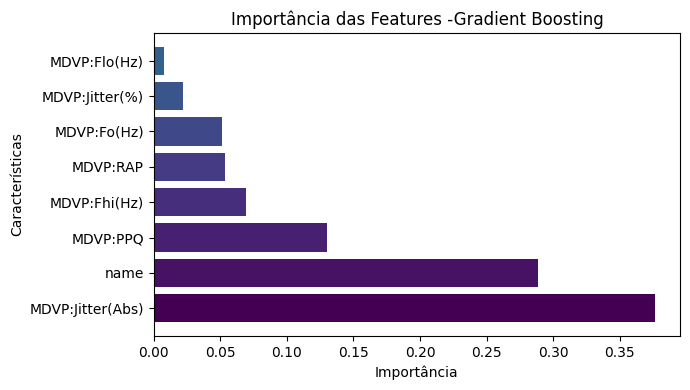

In [ ]:
# Calcular a importância das características
importances = best_model_gb.feature_importances_

# Obter os nomes das características
feature_names = df.columns

# Ordenar as importâncias das características em ordem decrescente
indices = np.argsort(importances)[::-1]

# Definir uma paleta de cores personalizada
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_names)))

# Plotar as importâncias das características com barras coloridas
plt.figure(figsize=(7, 4))
plt.title("Importância das Features -Gradient Boosting")
plt.barh(range(X.shape[1]), importances[indices], align="center", color=colors)
plt.yticks(range(X.shape[1]), feature_names[indices])
plt.xlabel("Importância")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


 Xgboosting ⚡

In [ ]:
#definindo modelo

modelo_xgb=XGBClassifier()

#definindo valores
valores_params= {
                    'n_estimators': [100, 200, 300],
                    'max_depth': [3, 4, 5],
                   'learning_rate': [0.1, 0.01, 0.001],
}

random_search = RandomizedSearchCV(estimator=modelo_xgb, param_distributions=valores_params, n_iter=10, cv=5)
random_search.fit (X_train_scaled, y_train)


#melhor modelo

best_model_xgb = random_search.best_estimator_

#Trazendo a Acuracia

accuracy = best_model_xgb.score(X_test_scaled, y_test)


y_pred_xgb = best_model_et.predict(X_test_scaled)

#confusion matrix

y_pred_xgb = best_model_et.predict(X_test_scaled)
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
accuracy = best_model_xgb.score(X_test_scaled, y_test)
print("Acurácia do modelo no conjunto de teste: {:.2f}".format(accuracy),'\n','Melhor parametro :',best_model_xgb)

Acurácia do modelo no conjunto de teste: 0.95 
 Melhor parametro : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


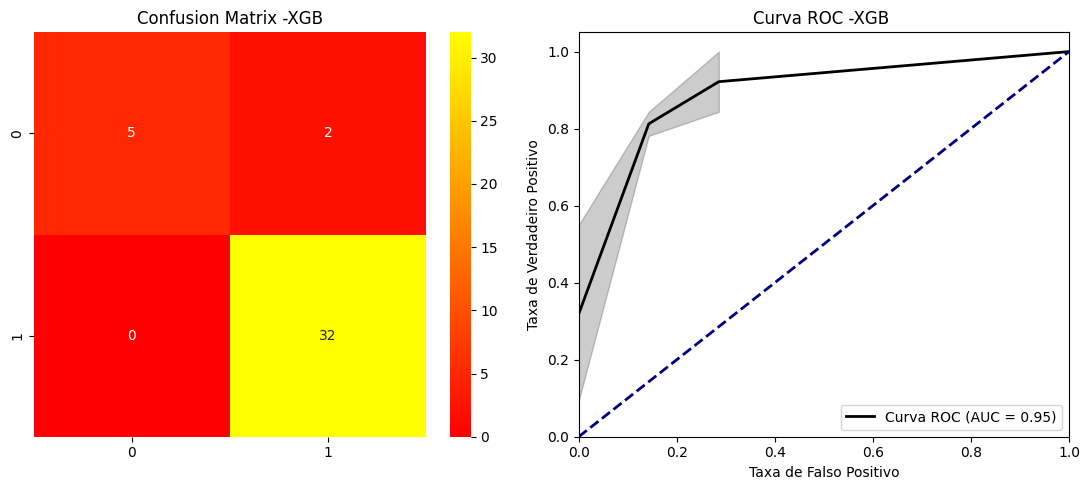

In [ ]:
y_prob = best_model_xgb.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)




# Configurar o layout dos subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# Plotar a matriz de confusão
sns.heatmap(confusion_mat_xgb, annot=True, cmap="autumn", ax=axs[0] )

axs[0].set_title("Confusion Matrix -XGB")

# Plotar a curva ROC
df_roc = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
sns.lineplot(x='False Positive Rate', y='True Positive Rate', data=df_roc, color='Black', lw=2,
             label='Curva ROC (AUC = %0.2f)' % roc_auc, ax=axs[1])
sns.lineplot(x=[0, 1], y=[0, 1], color='Navy', lw=2, linestyle='--', ax=axs[1])
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Taxa de Falso Positivo')
axs[1].set_ylabel('Taxa de Verdadeiro Positivo')
axs[1].set_title('Curva ROC -XGB ')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
print("Relatório de Classificação Xgboosting :\n", classification_rep_xgb)

Relatório de Classificação Xgboosting :
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



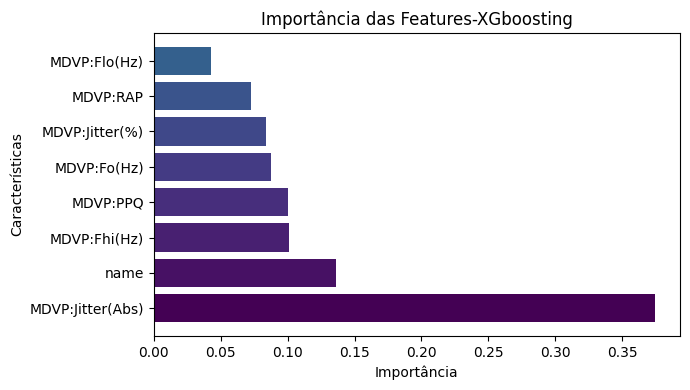

In [ ]:
# Calcular a importância das características
importances = best_model_xgb.feature_importances_

# Obter os nomes das características
feature_names = df.columns

# Ordenar as importâncias das características em ordem decrescente
indices = np.argsort(importances)[::-1]

# Definir uma paleta de cores personalizada
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_names)))

# Plotar as importâncias das características com barras coloridas
plt.figure(figsize=(7, 4))
plt.title("Importância das Features-XGboosting")
plt.barh(range(X.shape[1]), importances[indices], align="center", color=colors)
plt.yticks(range(X.shape[1]), feature_names[indices])
plt.xlabel("Importância")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


In [ ]:
avaliação_modelos = {'Acurácia': ['90%','90%','95%','90%','95%','95%','95%','95%','95%'] ,
                     'F1-Score classe (0)' :[0.60, 0.75, 0.75, 0.67,0.83,0.83,0.83, 0.83 ,0.83 ]}
df_modelos = pd.DataFrame(avaliação_modelos)
df_modelos.index = ['Regressão logistica', 'KNN ', 'SVM', 'Gaussian NB', 'Decision Tree','Random Forest' ,'Extra Tree', 'Gradient boosting', 'XGboosting' ]

---------------------------------------------------------------------------------------------------------------------------------------------------------------

### Comparação dos modelos

In [ ]:
df_modelos

,Acurácia,F1-Score classe (0)
Regressão logistica,90%,0.60
KNN,90%,0.75
SVM,95%,0.75
Gaussian NB,90%,0.67
Decision Tree,95%,0.83
Random Forest,95%,0.83
Extra Tree,95%,0.83
Gradient boosting,95%,0.83
XGboosting,95%,0.83


### Os modelos da categoria "Ensemble" (🥇) foram os que trouxeram a melhor acurácia e o melhor f1-score( classe 0)